In [1]:
!pip install opencv-python mediapipe
import matplotlib.pyplot as plt

import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
import math
import cv2
from time import time
import matplotlib.pyplot as plt
from IPython.display import HTML

# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5,min_tracking_confidence=0.5, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

In [2]:
def detectPose(image, pose, display=True):
  
    
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #  Pose Detection.
    results = pose.process(imageRGB)
    
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

In [3]:
def calculateAngle(landmark1, landmark2, landmark3):
  

    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    
    if angle < 0:

        
        angle += 360
    
    
    return angle

In [4]:
def classifyPose(landmarks, output_image, display=False):
   
   
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    left_elbow_anglev=str(left_elbow_angle)
    print("left elbow angle="+left_elbow_anglev)
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]) 
    right_elbow_anglev=str(right_elbow_angle)
    print("right elbow angle="+right_elbow_anglev)
    
    
    
    
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    left_shoulder_anglev=str(left_shoulder_angle)
    print("left shoulder angle="+left_shoulder_anglev)
    
    
    

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    right_shoulder_anglev=str(right_shoulder_angle)
    print("right shoulder angle="+right_shoulder_anglev)
    
    

   
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    left_knee_anglev=str(left_knee_angle)
    print("left knee angle="+left_knee_anglev)

    
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    right_knee_anglev=str(right_knee_angle)
    print("right knee angle="+right_knee_anglev)
    
    
    
    # Check if it is the warrior II pose or the T pose. 
   
    
    # Check if arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        # Check if at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

    # warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose' 
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # T pose.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                
                label = 'T Pose'
    
    # tree pose.
  
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 20 and right_knee_angle < 57:

           
            label = 'Tree Pose'
     
    #check for mountain pose
    if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
          if left_shoulder_angle > 0 and left_shoulder_angle < 30 and right_shoulder_angle > 0 and right_shoulder_angle < 30:
                
               #  mountain pose.
                label = 'Mountain Pose'
                
     #check for bridge pose
    if left_knee_angle > 270 and left_knee_angle < 295 and right_knee_angle > 270 and right_knee_angle < 295:
          if left_shoulder_angle > 310 and left_shoulder_angle < 330 and right_shoulder_angle > 30 and right_shoulder_angle < 50:
            if left_elbow_angle > 165 and left_elbow_angle < 185 and right_elbow_angle > 165 and right_elbow_angle < 185:
                label = 'bridge Pose' 
                
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0,0,255)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 5)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

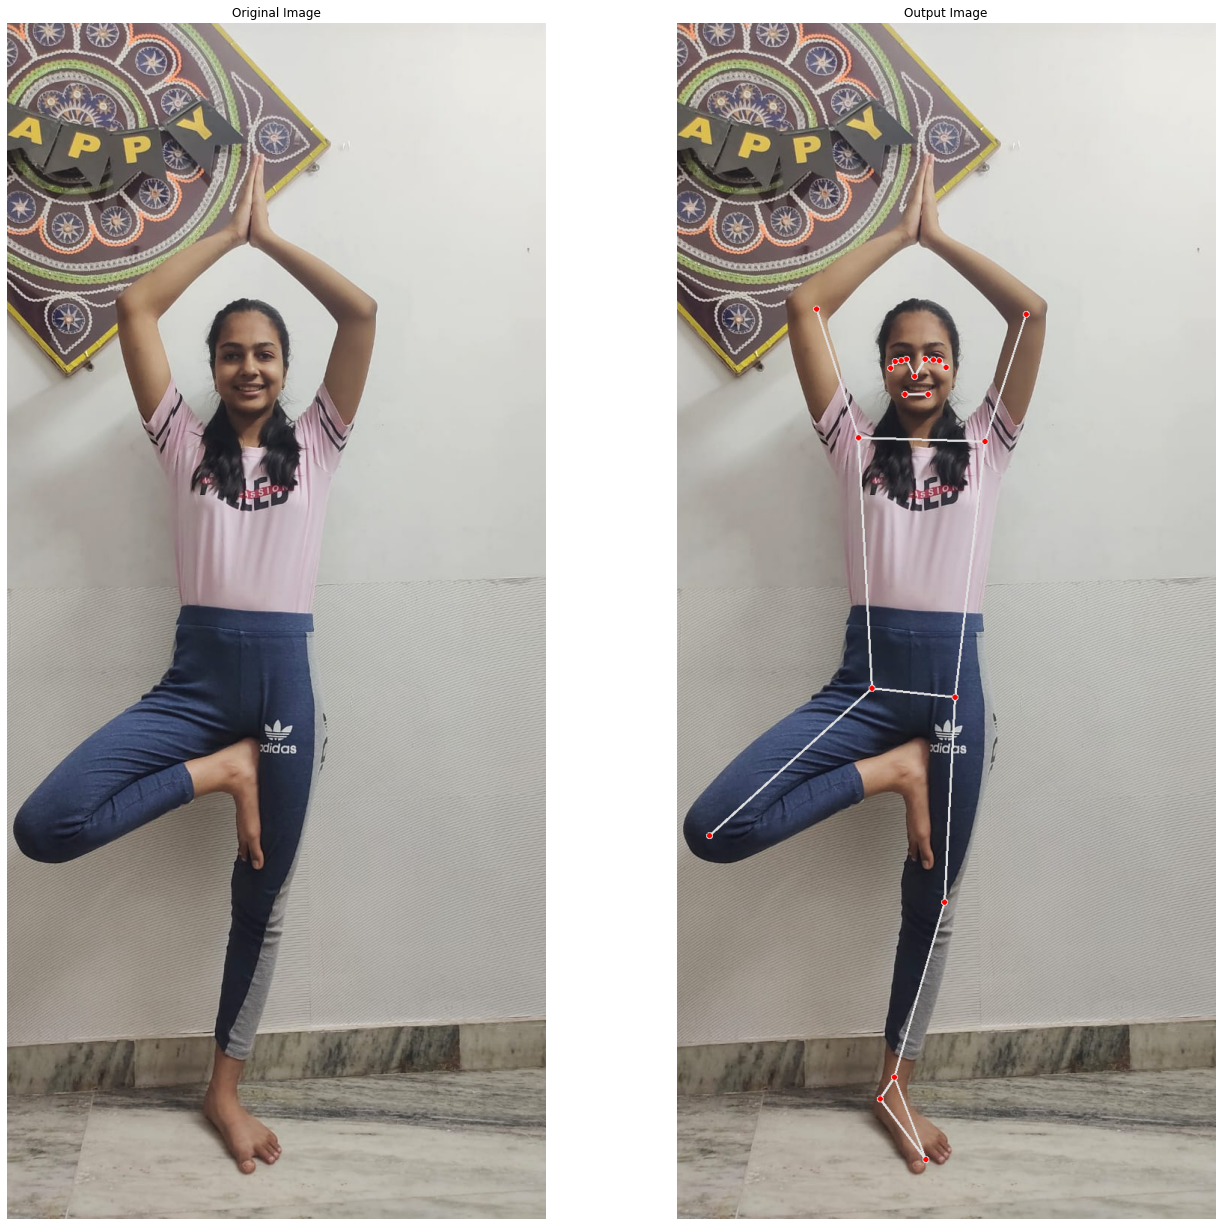

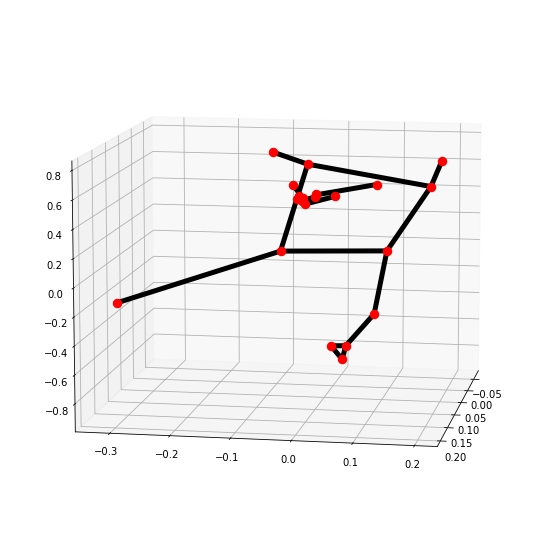

[(317, 472, -183.14756155014038), (331, 449, -151.94772005081177), (342, 450, -152.40235447883606), (350, 451, -152.203871011734), (306, 449, -147.16121077537537), (299, 451, -147.98917651176453), (291, 452, -148.3775818347931), (359, 460, 15.984033197164536), (285, 461, 34.65553790330887), (335, 496, -113.44607949256897), (304, 496, -112.737557888031), (411, 559, 28.719836175441742), (242, 554, 61.86205565929413), (466, 389, -90.20975947380066), (186, 382, -38.85974496603012), (332, 280, -91.82839751243591), (313, 275, -72.18125402927399), (324, 244, -117.0691430568695), (331, 237, -108.95322918891907), (323, 244, -88.24213922023773), (334, 237, -86.51526868343353), (325, 257, -80.64720690250397), (329, 252, -70.81835389137268), (371, 901, -10.439790487289429), (260, 889, 9.91631917655468), (357, 1175, 4.956210628151894), (43, 1086, -242.73253440856934), (290, 1409, 99.88561391830444), (290, 1008, 361.3714027404785), (271, 1438, 105.61225891113281), (327, 982, 433.27786445617676), (33

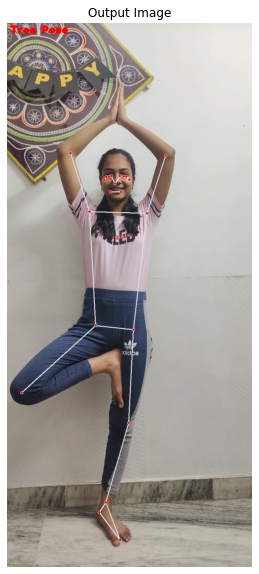

In [5]:
image = cv2.imread('tree16.jpeg')
output_image, landmarks = detectPose(image, pose, display=False)
detectPose(image, pose, display=True)
print(landmarks)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

left elbow angle=111.19811872180082
right elbow angle=247.91948813524715
left shoulder angle=168.74303291224663
right shoulder angle=165.04133607394937
left knee angle=193.0527519096845
right knee angle=24.70866979202763


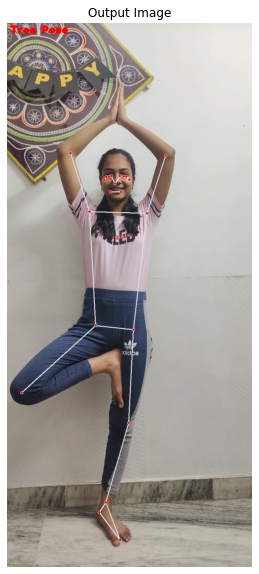

In [22]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('tree16.jpeg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [ ]:
import tkinter as tk

# Function to handle button 1 click event
def pose_classification():
    print("Pose classification!")
    image = cv2.imread('tree16.jpeg')
    output_image, landmarks = detectPose(image, pose, display=False)
    
#     print(landmarks)
    if landmarks:
        classifyPose(landmarks, output_image, display=True)

# Function to handle button 2 click event
def pushup_counter():
    print("pushup counter!")
        
    video_path = 'push up video2.mp4'  
    pushup_count = 0
    pushup_detected = False
    WIDTH = 600
    HEIGHT = 600
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        cap = cv2.VideoCapture(video_path)  
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                print("End of video.")
                break
    
            # Convert the BGR image to RGB.
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (WIDTH, HEIGHT))
            image.flags.writeable = False
    
            # Process the image and detect the pose landmarks.
            results = pose.process(image)
    
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
            if results.pose_landmarks is not None:
                # Get the left and right shoulder and hip landmarks.
                left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
                right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
                left_hip = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP]
                right_hip = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP]
    
                # Calculate the angle between the shoulders and hips.
                angle = abs((left_shoulder.y - left_hip.y) + (right_shoulder.y - right_hip.y))
    
                if angle < 0.1:  # If the angle is less than a threshold, consider it as a push-up
                    if not pushup_detected:  # If a push-up has not been detected in the previous frame
                        pushup_count += 1
                        pushup_detected = True  # Set the flag to True to avoid counting multiple times for the same push-up
                else:
                    pushup_detected = False  # Reset the flag if the angle is not below the threshold
    
            # Draw the pose landmarks and the push-up count on the frame.
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            cv2.putText(image, f"Push-ups: {pushup_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
            cv2.imshow('Push-up Counter', image)
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
    
        cap.release()
        cv2.destroyAllWindows()


# Function to handle button 3 click event
def pullup_counter():
    print("pullup counter!")
        
    # Define the y-coordinate thresholds for the "down" and "up" wrist positions
    DOWN_POS_THRESHOLD = 0.6
    UP_POS_THRESHOLD = 0.8
    WIDTH = 700
    HEIGHT = 600
    
    # Initialize pull-up counting variables
    pull_up_count = 0
    is_pull_up = False
    
    cap = cv2.VideoCapture("pull_up2.mp4")
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, WIDTH)  # Set the desired width of the video frames
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, HEIGHT) 
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("End of video.")
                break
    
            # Convert the BGR image to RGB before processing
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (WIDTH, HEIGHT))
            image.flags.writeable = False
    
            # Process the image with the pose model
            results = pose.process(image)
    
            # Draw the pose landmarks on the image
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    
                # Get the position of the right wrist and shoulder landmarks
                right_wrist_pos = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y
                right_shoulder_pos = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y
                left_wrist_pos= results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y
                left_shoulder_pos = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y
    
                # Check if the right wrist is in the "down" position for a push-up
                if right_wrist_pos < right_shoulder_pos * DOWN_POS_THRESHOLD and left_wrist_pos < left_shoulder_pos * DOWN_POS_THRESHOLD:
                    is_pull_up = True
    
               
                if is_pull_up and right_wrist_pos > right_shoulder_pos * UP_POS_THRESHOLD and left_wrist_pos > left_shoulder_pos * UP_POS_THRESHOLD:
                    pull_up_count += 1
                    is_pull_up = False
    
            # Draw the push-up count on the image
            font = cv2.FONT_HERSHEY_SIMPLEX
            org = (50, 100)
            font_scale = 2
            color = (255, 0, 0)
            thickness = 3
            image = cv2.putText(image, "Pull-up count: " + str(pull_up_count), org, font, font_scale, color, thickness, cv2.LINE_AA)
    
            # Show the image and wait for a key press
            cv2.imshow('MediaPipe Pose', image)
            if cv2.waitKey(1) & 0xFF == 27:
                break
    
        cap.release()
        cv2.destroyAllWindows()    


# Function to handle button 4 click event
def jumping_jacks_counter():
    print("jumping jacks counter!")
        
    cap = cv2.VideoCapture("jj video.mp4")  
    jj_count = 0
    jj_detected = False
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                print("End of video.")
                break
    
            # Convert the BGR image to RGB.
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            image.flags.writeable = False
    
            # Process the image and detect the pose landmarks.
            results = pose.process(image)
    
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
            if results.pose_landmarks is not None:
                # Get the landmarks of the left and right shoulder, elbow, wrist, and hip.
                left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
                right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
                left_elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]
                right_elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW]
                left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
                right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
                left_hip = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP]
                right_hip = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP]
                left_knee = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE]
                right_knee = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE]
                left_ankle = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE]
                right_ankle = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE]
    
                # Calculate the angles of the left and right arms with respect to the body.
                left_arm_angle = (180 - math.degrees(math.atan2(left_wrist.y - left_elbow.y, left_wrist.x - left_elbow.x)
                                                     - math.atan2(left_elbow.y - left_shoulder.y, left_elbow.x - left_shoulder.x)))
                right_arm_angle = (180 - math.degrees(math.atan2(right_wrist.y - right_elbow.y, right_wrist.x - right_elbow.x)
                                                      - math.atan2(right_elbow.y - right_shoulder.y, right_elbow.x - right_shoulder.x)))
    
                # Calculate the angles of the left and right legs with respect to the body.
                left_leg_angle = (180 - math.degrees(math.atan2(left_knee.y - left_hip.y, left_knee.x - left_hip.x)
                                                     - math.atan2(left_ankle.y - left_knee.y, left_ankle.x - left_knee.x)))
                right_leg_angle = (180 - math.degrees(math.atan2(right_knee.y - right_hip.y, right_knee.x - right_hip.x)
                                                      - math.atan2(right_ankle.y - right_knee.y, right_ankle.x - right_knee.x)))
    
                # Check if the left and right arms are extended and the left and right legs are together.
                if left_arm_angle < 220 and right_arm_angle < 220 and abs(left_leg_angle - right_leg_angle) < 320:
                    if not jj_detected:
                        jj_count += 1
                        jj_detected = True
                else:
                    jj_detected = False
    
                # Draw the pose landmarks and the angles on the image.
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                cv2.putText(image, f"Left Arm Angle: {int(left_arm_angle)}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
                cv2.putText(image, f"Right Arm Angle: {int(right_arm_angle)}", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
                cv2.putText(image, f"Left Leg Angle: {int(left_leg_angle)}", (20, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
                cv2.putText(image, f"Right Leg Angle: {int(right_leg_angle)}", (20, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
                cv2.putText(image, f"Jumping Jacks: {jj_count}", (20, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    
            cv2.imshow('Jumping Jack Counter', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    
    cap.release()
    cv2.destroyAllWindows()

# Create the main window
root = tk.Tk()
root.title("Yoga AI")  # Set window title
root.geometry("500x400")  # Set window size

# Create button 1 with styling options
button1 = tk.Button(root, text="Pose classification", command=pose_classification, font=("Helvetica", 14), fg="white", bg="blue")
button1.pack(pady=10, padx=10)  

# Create button 2 with styling options
button2 = tk.Button(root, text="Pushup counter", command=pushup_counter, font=("Helvetica", 14), fg="white", bg="green")
button2.pack(pady=10, padx=10) 

# Create button 3 with styling options
button3 = tk.Button(root, text="Pullup counter", command=pullup_counter, font=("Helvetica", 14), fg="white", bg="red")
button3.pack(pady=10, padx=10)  

# Create button 4 with styling options
button4 = tk.Button(root, text="Jumping Jacks counter", command=jumping_jacks_counter, font=("Helvetica", 14), fg="white", bg="purple")
button4.pack(pady=10, padx=10)


root.mainloop()


pullup counter!
